In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
code_path = os.path.abspath('../code')

# Add the path to sys.path
if code_path not in sys.path:
    sys.path.append(code_path)

In [3]:
from week3 import particle
import numpy as np

In [4]:
resolution = 0.5
my_particle = particle(
    ymax=4, vmax=4, 
    pc=0.2, pw=0.2, 
    dv=resolution, dy=resolution, 
    f_phi=lambda y: 1.5*np.sin(2*np.pi*y/4) 
)
goal=(0,0)

def R(s_next, a, s, c=0.01, goal=goal):
    return np.array([np.allclose(si, goal, atol=resolution/2) for si in s_next]) - np.abs(a)*c

In [5]:
value, policy = my_particle.policy_iteration(R=R, gamma=0.9, goal=goal)

Text(0.5, 1.0, 'Value Function Heatmap')

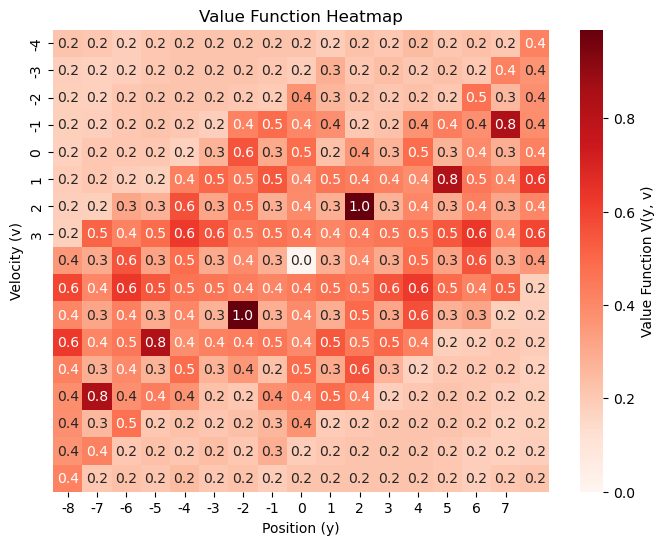

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axe = plt.subplots(1, figsize=(8, 6))

sns.heatmap(value.T, annot=True, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Value Function V(y, v)'},
            xticklabels=range(int(-my_particle.ymax/resolution), int(my_particle.ymax/resolution)), 
            yticklabels=range(int(-my_particle.vmax), int(my_particle.vmax)))

axe.set_xlabel('Position (y)')
axe.set_ylabel('Velocity (v)')

axe.set_title('Value Function Heatmap')

In [7]:
def plot_trajectory(trajectory, force, title):
    y_vals = trajectory[:, 0]
    v_vals = trajectory[:, 1]

    plt.figure(figsize=(10, 6))

    plt.plot(y_vals, v_vals, color='blue', lw=2)

    for i in range(len(force)):
        x_pos = y_vals[i]
        y_pos = v_vals[i]

        if force[i] == -1:
            dy, dx = -0.5, 0
        elif force[i] == 1:
            dy, dx = 0.5, 0
        else:
            dx, dy = 0, 0

        # Plot the arrow at the trajectory point
        plt.quiver(x_pos, y_pos, dx, dy, scale=10, color='red', width=0.005)

    plt.xlim(-my_particle.ymax-0.5, my_particle.ymax+0.5)
    plt.ylim(-my_particle.vmax-0.5, my_particle.vmax+0.5)
    plt.gca().set_aspect('equal')
    plt.xlabel('Position (y)')
    plt.ylabel('Velocity (v)')
    plt.title(title)
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    print("Particle ends at:", trajectory[-1])

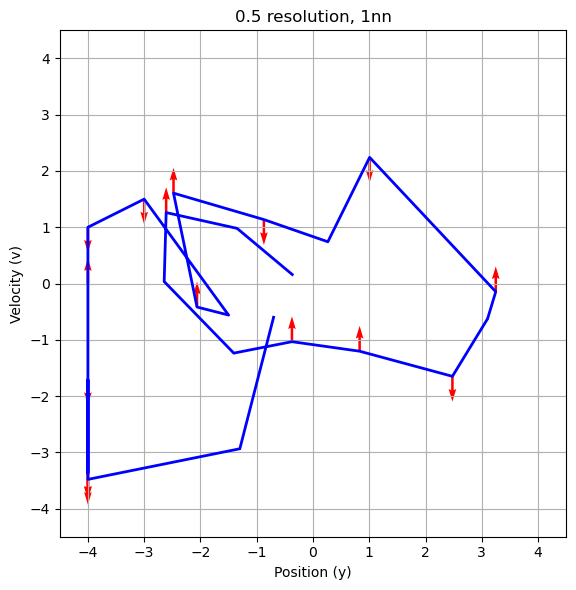

Particle ends at: [-0.36815217  0.15998211]


In [8]:
trajectory, force = my_particle.simulate_trajectory(value, policy, -0.7, -0.6, R, gamma=0.9, look_ahead=False, mode="1nn")
plot_trajectory(trajectory, force, "0.5 resolution, 1nn")

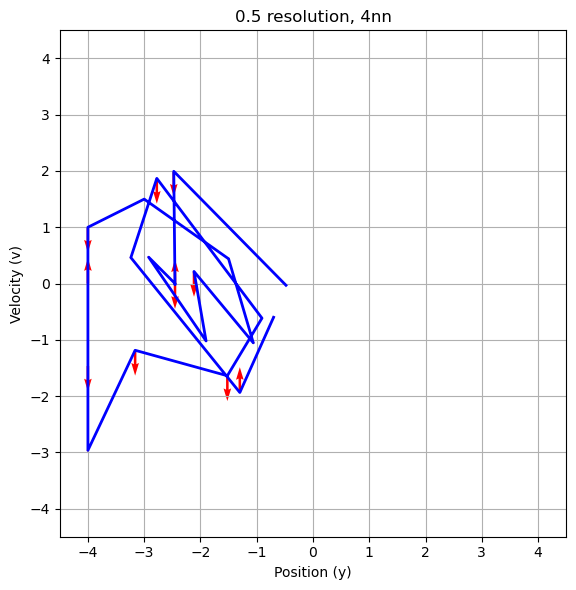

Particle ends at: [-0.47953039 -0.03133809]


In [9]:
trajectory, force = my_particle.simulate_trajectory(value, policy, -0.7, -0.6, R, gamma=0.9, look_ahead=False, mode="4nn")
plot_trajectory(trajectory, force, "0.5 resolution, 4nn")

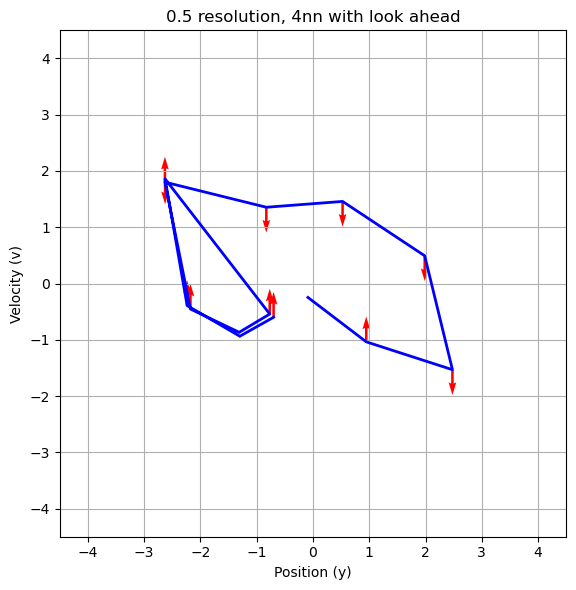

Particle ends at: [-0.08954086 -0.24699198]


In [10]:
trajectory, force = my_particle.simulate_trajectory(value, policy, -0.7, -0.6, R, gamma=0.9, look_ahead=True)
plot_trajectory(trajectory, force, "0.5 resolution, 4nn with look ahead")

In [11]:
# Next we define resolution to be 0.25 and see what will happen
resolution = 0.25
my_particle = particle(
    ymax=4, vmax=4, 
    pc=0.2, pw=0.2, 
    dv=resolution, dy=resolution, 
    f_phi=lambda y: 1.5*np.sin(2*np.pi*y/4) 
)
value, policy = my_particle.policy_iteration(R=R, gamma=0.9, goal=goal)

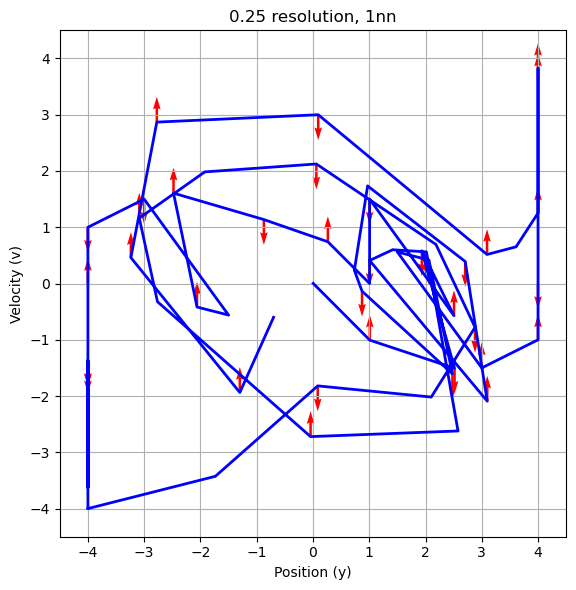

Particle ends at: [0.00381264 0.00260568]


In [19]:
trajectory, force = my_particle.simulate_trajectory(value, policy, -0.7, -0.6, R, gamma=0.9, look_ahead=False, mode="1nn")
plot_trajectory(trajectory, force, "0.25 resolution, 1nn")

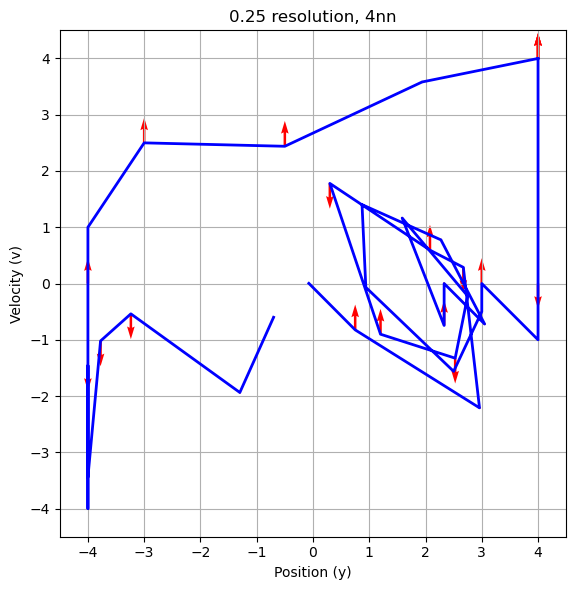

Particle ends at: [-0.07360763  0.00320086]


In [21]:
trajectory, force = my_particle.simulate_trajectory(value, policy, -0.7, -0.6, R, gamma=0.9, look_ahead=False, mode="4nn")
plot_trajectory(trajectory, force, "0.25 resolution, 4nn")

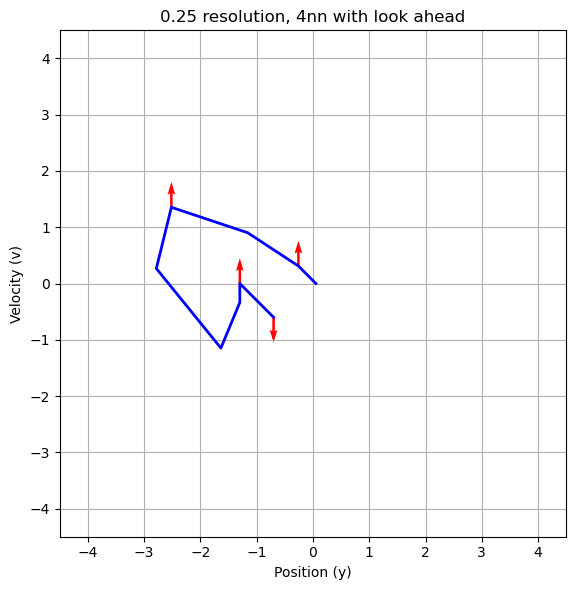

Particle ends at: [0.05227158 0.        ]


In [25]:
trajectory, force = my_particle.simulate_trajectory(value, policy, -0.7, -0.6, R, gamma=0.9, look_ahead=True)
plot_trajectory(trajectory, force, "0.25 resolution, 4nn with look ahead")